<img src="https://www.insper.edu.br/wp-content/themes/insper/dist/image/logo.png" alt="Insper" style="float: right; display:inline; transform:scale(0.5);">

# Projeto Twitter
**Autores**: Renato de Camargo  /  **Data**: abril/2020


## Proposta:
Realizar análise de dados não estruturados com fonte de dados o WEB API do Twitter.<br>

Para nosso exercício, escolhemos analisar os tweets de 5 grandes grupos jornalísticos do Brasil:
- CNNBrasil
- G1
- Folha
- Estadao
- Bandjornalismo

Nossa proposta será analisar os tweeties para responder as seguintes perguntas:
- Qual o jornal mais popular com o maior número de favoritadas e retweets ?
- Qual a proporção de tweets por jornal a respeito de dois grandes temas do momento: Corona vírus e Bolsonaro?
- Qual tema gera mais favoritadas: Corona vírus ou Bolsonaro?
    - Há diferença por jornal?
- Quais os principais temas retratados no twitter pelos jornais
    - Há diferença por jornal?
    
Análise foi feita com os dados do dia 09/Abril período da manhã.

## Realização

#### Passo 01: importar bibliotecas e acesssar o twitter

In [341]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc

<em style="background-color:red; color:white; padding:10px"><b>Atenção</b> trocar pelas suas credenciais no Twitter<em>

In [2]:
import twitter

api = twitter.Api(
        consumer_key='',
        consumer_secret='',
        access_token_key='',
        access_token_secret='')

In [3]:
api.VerifyCredentials()

User(ID=1223661628782260226, ScreenName=CamargoRenatoc)

<br>
<br>

#### Passo 02: Capturar o status das 05 paginas de jornalismo

Retiramos todos os tweets tipo respostas ou retweet para poder avaliar o desempenho de de suas próprias postagens

In [4]:
CNNBrasil_status = api.GetUserTimeline(screen_name="CNNBrasil",count= 200,exclude_replies=True,include_rts = False)

g1_status = api.GetUserTimeline(screen_name="g1",count= 200,exclude_replies=True,include_rts = False)

folha_status = api.GetUserTimeline(screen_name="folha",count= 200,exclude_replies=True ,include_rts = False)

estadao_status = api.GetUserTimeline(screen_name="estadao",count= 200,exclude_replies=True,include_rts = False)

bandjornalismo_status = api.GetUserTimeline(screen_name="bandjornalismo",count= 200,exclude_replies=True,include_rts = False)

<br>
<br>

#### Passo 03: Tabular as informações em um único data frame. 
Para isso, criamos a função "Tabular" que busca: *Nome da Página, Texto, Data de Criação, Quantidade de Favoritadas e Quantidade de Retweets*<br>
Como nem todos status têm favoritadas ou retweets, tivemos que criar as condições para quando elas não são encontradas, igualando seu valor a zero. 

In [5]:
def tabular (tweet):
    temp = pd.DataFrame( [ [ status.AsDict()['user'].get('name'), status.AsDict()['text'], status.AsDict()['created_at'], status.AsDict()['favorite_count'], status.AsDict()['retweet_count'] ] 
                          if 'retweet_count' in status.AsDict() else 
                          [status.AsDict()['user'].get('name'), status.AsDict()['text'], status.AsDict()['created_at'], status.AsDict()['favorite_count'], 0]
                          
                          if 'favorite_count' in status.AsDict() else 
                          [status.AsDict()['user'].get('name'), status.AsDict()['text'], status.AsDict()['created_at'], 0, status.AsDict()['retweet_count']]
                          
                          if 'favorite_count' and 'retweet_count' in status.AsDict() else 
                          [status.AsDict()['user'].get('name'), status.AsDict()['text'], status.AsDict()['created_at'], 0, 0]
                          
                          for status in tweet],
             columns=['fonte','mensagem','data','favoritadas','retweet'])
    return temp

In [6]:
#tabular os status de uma única página
df1 = tabular(CNNBrasil_status)
df2 = tabular(g1_status)
df3 = tabular(folha_status)
df4 = tabular(estadao_status)
df5 = tabular(bandjornalismo_status)

#consolidar tudo em um único dataframe
df =  pd.concat([df1,df2,df3,df4,df5])

In [7]:
df.head()

fonte                                           mensagem  \
0  CNN Brasil  Diante dos casos confirmados, a Prefeitura do ...   
1  CNN Brasil  O cessar-fogo do conflito, que já dura cinco a...   
2  CNN Brasil  O dispositivo ajuda pacientes com infecções pu...   
3  CNN Brasil  ANÁLISE: Para Basília Rodrigues, analista de p...   
4  CNN Brasil  Segundo a Procuradoria Geral da República, o m...   

                             data  favoritadas  retweet  
0  Thu Apr 09 13:01:01 +0000 2020           14        0  
1  Thu Apr 09 12:51:01 +0000 2020           72        8  
2  Thu Apr 09 12:35:47 +0000 2020          129       21  
3  Thu Apr 09 12:15:19 +0000 2020          107       10  
4  Thu Apr 09 11:57:42 +0000 2020          214       15

<br>
<br>

#### Passo 04: Análise dos dados

1) Qual o jornal mais popular com o maior número de favoritadas e retweets ?

In [235]:
#criação de um dataframe com os resultados agrupados por jornal
agrupado =  df.groupby('fonte').sum()
agrupado['contagem'] = df[['fonte','mensagem']].groupby('fonte').count()

agrupado["favoXtweet"] = round(agrupado['favoritadas']/agrupado['contagem'],0) #favoritadas médias por tweet por jornal
agrupado["retweetXtweet"] = round(agrupado['retweet']/agrupado['contagem'],0) #retweets médios por tweet por jornal

agrupado

favoritadas  retweet  Bolsonaro  Corona  Brasil  contagem  \
fonte                                                                         
Band Jornalismo          8955     1750       18.0    62.0    13.0       191   
CNN Brasil              57761     7559       13.0    29.0     6.0       174   
Estadão                 38901     5484       21.0    60.0     7.0       181   
Folha de S.Paulo       106836    12620       26.0    59.0     4.0       164   
G1                     237162    35898       12.0    98.0    10.0       197   

                  favoXtweet  retweetXtweet  
fonte                                        
Band Jornalismo         47.0            9.0  
CNN Brasil             332.0           43.0  
Estadão                215.0           30.0  
Folha de S.Paulo       651.0           77.0  
G1                    1204.0          182.0

o G1 é o jornal mais popular, tendo disparado o maior número médio de favoritadas e retweets, quase o dobro do segundo colocado (Folha). O Jornal menos popular é o Band Jornalismo com menos de 5% das interações que o G1 apresenta. A baixo a representação gráfica:

Text(0, 0.5, 'retweets médio')

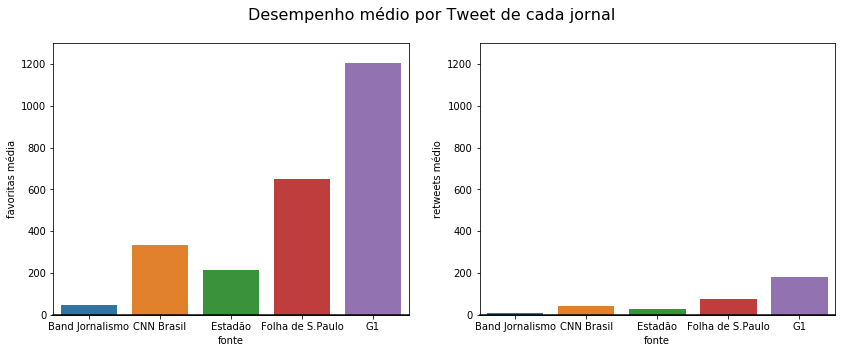

In [252]:
# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharex=True)
f.suptitle('Desempenho médio por Tweet de cada jornal', fontsize=16)

sns.barplot(x = agrupado.index, y="favoXtweet", data=agrupado,ax=ax1).set(ylim=(0,1300))
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("favoritas média")


sns.barplot(x = agrupado.index, y="retweetXtweet", data=agrupado,ax=ax2).set(ylim=(0,1300))
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("retweets médio")



<br>
<br>
<br>
2) Qual a proporção de tweets por jornal a respeito de dois grandes temas do momento: Corona vírus e Bolsonaro?

Aqui será considerado dentro do tema "Corona vírus" qualquer menção com as palavras "corona", "covid" e "Pandemia".
Para o tema tema "Bolsonaro", qualquer menção com as palavras "Bolsonaro" e "Presidente"

In [223]:
#Criação de uma nova coluna com a identificação dos tweets para cada um dos temas:
df['Bolsonaro'] = df['mensagem'].str.contains('Bolsonaro|presidente', case = False)
df['Corona'] = df['mensagem'].str.contains('corona|covid|pandemia', case = False)


In [256]:
#inclusão desses indicadores da base agrupada, com os valores absolutos e o % em relação ao total de tweets de cada jornal
agrupado['Bolsonaro'] = df[['fonte','Bolsonaro']].groupby('fonte').sum() 
agrupado['Corona'] = df[['fonte','Corona']].groupby('fonte').sum() 

agrupado['Bolsonaro%'] =  agrupado.Bolsonaro /agrupado.contagem
agrupado['Corona%'] = agrupado.Corona / agrupado.contagem

agrupado

favoritadas  retweet  Bolsonaro  Corona  Brasil  contagem  \
fonte                                                                         
Band Jornalismo          8955     1750       18.0    62.0    13.0       191   
CNN Brasil              57761     7559       13.0    29.0     6.0       174   
Estadão                 38901     5484       21.0    60.0     7.0       181   
Folha de S.Paulo       106836    12620       26.0    59.0     4.0       164   
G1                     237162    35898       12.0    98.0    10.0       197   

                  favoXtweet  retweetXtweet  Bolsonaro%   Corona%  
fonte                                                              
Band Jornalismo         47.0            9.0    0.094241  0.324607  
CNN Brasil             332.0           43.0    0.074713  0.166667  
Estadão                215.0           30.0    0.116022  0.331492  
Folha de S.Paulo       651.0           77.0    0.158537  0.359756  
G1                    1204.0          182.0    0.060914  0.497462

O G1 é o canal que mais faz publicação com o tema Corona vírus, representando quase metade de seus tweets, enquanto a CNNBRasil é a que menos se dedica a esse tema, com apenas 17% dos tweets.<br>
Quanto ao tema Bolsonaro, todos jornais ficam mais próximos, com a Folha liderando com a proporção de 16% de seus tweets e por último o G1 com penas 6%.<br>
A baixo a representação gráfica:

Text(0, 0.5, '% tweets sobre Corona')

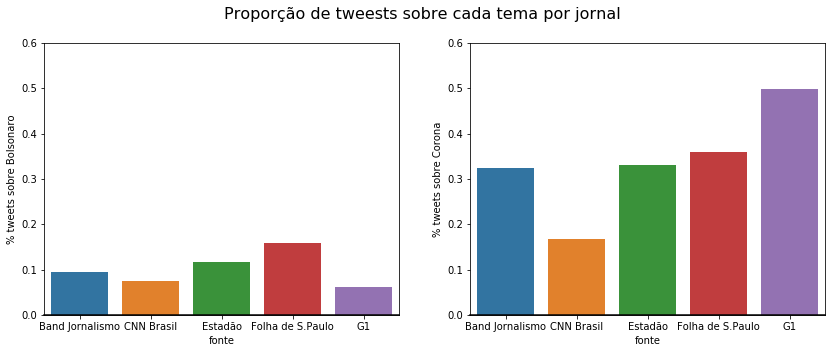

In [260]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharex=True)
f.suptitle('Proporção de tweests sobre cada tema por jornal', fontsize=16)

sns.barplot(x = agrupado.index, y="Bolsonaro%", data=agrupado,ax=ax1).set(ylim=(0,.6))
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("% tweets sobre Bolsonaro")


sns.barplot(x = agrupado.index, y="Corona%", data=agrupado,ax=ax2).set(ylim=(0,.6))
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("% tweets sobre Corona")

<br>
<br>

3) Qual tema gera mais favoritadas: Corona vírus ou Bolsonaro?

In [303]:
print( df.groupby('Corona')['favoritadas'].sum() / df.groupby('Corona')['favoritadas'].count())
print(df.groupby('Bolsonaro')['favoritadas'].sum() / df.groupby('Bolsonaro')['favoritadas'].count())


Corona
False    507.889816
True     472.042208
Name: favoritadas, dtype: float64
Bolsonaro
False     422.002448
True     1164.877778
Name: favoritadas, dtype: float64


O tema Bolsonaro gera em média 2,5 vezes mais favoritadas que o tema Corna vírus. Inclusive, tweets com o tema corona tem um desempenho ligeramente inferior do que os tweets sem esse tema. A baixo a representação gráfica.

Text(0.5, 1.0, 'Favoritadas média com o tema Bolsonaro')

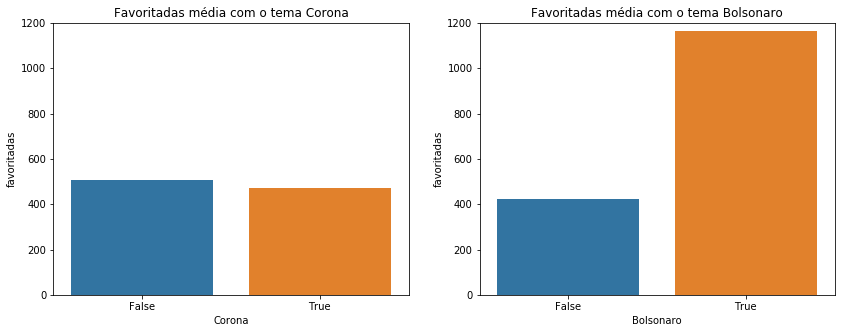

In [314]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

sns.barplot(x = "Corona", y="favoritadas",  data=df, ci = 0, ax=ax1).set(ylim=(0,1200))
ax1.set_title("Favoritadas média com o tema Corona")

sns.barplot(x = "Bolsonaro", y="favoritadas",  data=df, ci = 0, ax=ax2).set(ylim=(0,1200))
<br>ax2.set_title("Favoritadas média com o tema Bolsonaro")

<br>
<br>

3.1) Há diferença por jornal de qual tema gera mais favoritadas: Corona vírus ou Bolsonaro?

In [261]:
agrupado['pop_Corona'] = round(df.loc[(df.Corona == True)].groupby('fonte')['favoritadas'].sum() /agrupado.Corona)
agrupado['pop_Bolsonaro'] = round(df.loc[(df.Bolsonaro == True)].groupby('fonte')['favoritadas'].sum()/agrupado.Bolsonaro)
agrupado

favoritadas  retweet  Bolsonaro  Corona  Brasil  contagem  \
fonte                                                                         
Band Jornalismo          8955     1750       18.0    62.0    13.0       191   
CNN Brasil              57761     7559       13.0    29.0     6.0       174   
Estadão                 38901     5484       21.0    60.0     7.0       181   
Folha de S.Paulo       106836    12620       26.0    59.0     4.0       164   
G1                     237162    35898       12.0    98.0    10.0       197   

                  favoXtweet  retweetXtweet  Bolsonaro%   Corona%  pop_Corona  \
fonte                                                                           
Band Jornalismo         47.0            9.0    0.094241  0.324607        31.0   
CNN Brasil             332.0           43.0    0.074713  0.166667       318.0   
Estadão                215.0           30.0    0.116022  0.331492       146.0   
Folha de S.Paulo       651.0           77.0    0.158537  0.359756       569.0   
G1                    1204.0          182.0    0.060914  0.497462       938.0   

                  pop_Bolsonaro  
fonte                            
Band Jornalismo           202.0  
CNN Brasil                680.0  
Estadão                   308.0  
Folha de S.Paulo         1490.0  
G1                       3931.0

O tema Bolsonaro recebe mais favoritadas do que a média de desempenho de todos os jornais, enquanto que o tema Corona Vírus fica abaixo do desempenho médio em todos os jornais.Vale destacar o desempenho do tema Bolsonaro no G1, tendo 3 vezes mais favoritadas que a média dos tweets do jornal.<br>
A baixo a representação gráfica:

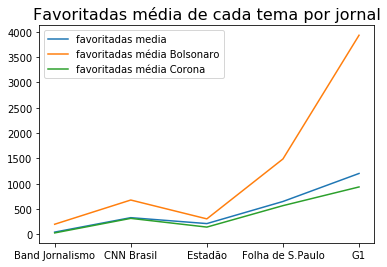

In [286]:
plt.plot(agrupado.index, agrupado.favoXtweet, label = 'favoritadas media')
plt.plot(agrupado.index, agrupado.pop_Bolsonaro,label = 'favoritadas média Bolsonaro')
plt.plot(agrupado.index, agrupado.pop_Corona,label = 'favoritadas média Corona')
plt.legend(loc='best')
plt.title("Favoritadas média de cada tema por jornal", fontsize = 16)
plt.show()

<br>
<br>

4) Quais os principais temas retratados no twitter pelos jornais?

faremos essa análise construindo uma núvem de palavras com todos os tweets. Antes, precisamos retirar as "palavras paradas" sem significado fora de uma frase, por exemplo "a", "que" e "são". Essa lista de palavras foi definida por nós contendo 32 elementos.

In [391]:
#Função para limpar o texto de 'palavras paradas'

def limpeza (texto):
    texto = texto.replace('https',"").replace(' de ',"").replace(' da ',"") \
    .replace(' para ',"").replace(' que ',"").replace(' por ',"") \
    .replace(' pelo ',"").replace(' em ',"").replace(' na ',"")\
    .replace(' os ',"").replace('G1',"").replace(' pela ',"")\
    .replace(' se ',"").replace(' como ',"").replace(' está ',"")\
    .replace(' dos ',"").replace(' um ',"").replace(' até ',"")\
    .replace(' diz ',"").replace(' tem ',"").replace(' ao ',"")\
    .replace(' não ',"").replace(' mais ',"").replace(' sobre ',"")\
    .replace(' ser ',"").replace(' já ',"").replace(' uma ',"")\
    .replace(' foi ',"").replace(' ser ',"").replace(' seu ',"")\
    .replace('Estadao',"").replace(' via ',"")
    #.replace('',"").replace('',"").replace('',"")
    return texto

In [375]:
#Função para criar a nuvem de palavras'

def nuvem(texto):
    wordcloud = wc.WordCloud(max_font_size=50, 
                         max_words=100, 
                         background_color="white").generate(textao)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

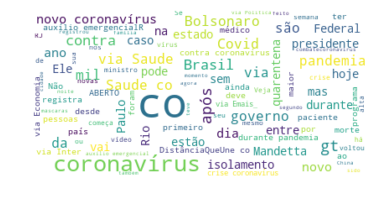

In [389]:
textao = ''.join(df.mensagem) #colocar todos os tweets em um único string

textao = limpeza(textao) #chama a funçao para limpar o texto
nuvem(textao) #chama a funçao para criar a nuvem

Com a nuvem de palavras é possível observar que os principais temas girma em torno do Coronavírus, envolvento termos como 'corona', 'quarentena', 'isolamento', 'pandemia' e 'saúde'.<br>
Outro tema recorrente é o governo, com termos como 'Bolsonaro', 'federal', 'governo', 'presidente' e 'estado'.<br>
Vemos um destaque também de citações ao ministro da saúde Luiz Henrique Mandetta.

<br>
<br>
4.1) Há diferença por jornal de quais os principais temas retratados no twitter?

CNN Brasil


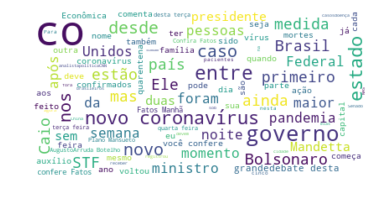

G1


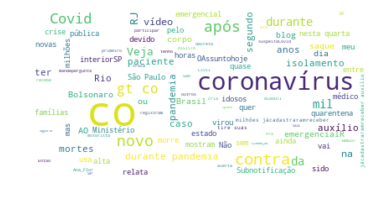

Folha de S.Paulo


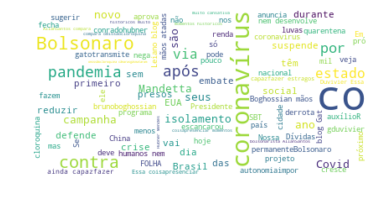

Estadão


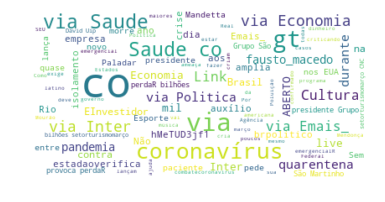

Band Jornalismo


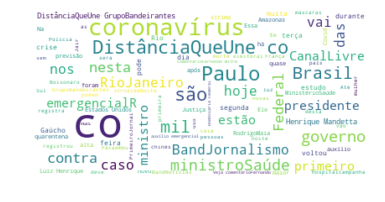

In [392]:
#Criamos um loop para passar por todos os Jornais, criar uma única string com todos os tweets
#limpar o texto e criar a nuvem

for nome in df.fonte.unique():
    textao = ''.join(df.loc[(df.fonte == nome)]['mensagem'])
    textao = limpeza(textao)
    print(nome)
    nuvem(textao)

Analisando a nuvem de palavra de cada jornal, vemos que:<br> 
- a CNN é o jornal com mais palavras ligadas ao governo, tendo a nuvem com palavras de tamanaho mais proporcionais. 
- o G1 tem a maior proporção de temas relacionado ao "Coronavírus". Tem o tamanho de palavras mais desproporcionais, ficando os demais temas despriorizados. 
- Estadão usa mais marcadores para apresentar suas notícias como "Cultura" "Economia" e "Estadao Verifica". Também cita seus jornalistas, como o Fausto Macedo.
- a Band tem o destaque para a campanha "Distância que une"